<a href="https://colab.research.google.com/github/Murtadho11/tugas/blob/main/Source%20Code%20ML3%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Murtadho jumatec

In [ ]:
#Import Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
df = pd.read_csv('customer_churn_dataset.csv', index_col=['customer_id'])
df

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [ ]:
df['product'] = df['product'].map({'Kartu A': 0, 'Kartu B': 1, 'Kartu C': 2})
df.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

print(X)

[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4)
print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)

Train set :  (8000, 13) (8000,)
Test set :  (2000, 13) (2000,)


In [ ]:
k = 7

model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.93475
Test set Accuracy :  0.9185


In [ ]:
Ks = 21
accuracies = []
precisions = []
recalls = []

for k in range(1, Ks):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_hat = knn.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_hat))
  precisions.append(metrics.precision_score(y_test, y_hat))
  recalls.append(metrics.recall_score(y_test, y_hat))

  print('k = ', k)
  print("Accuracy = ", metrics.accuracy_score(y_test, y_hat))
  print("Precision = ", metrics.precision_score(y_test, y_hat))
  print("Recall = ", metrics.recall_score(y_test, y_hat),'\n')

k =  1
Accuracy =  0.914
Precision =  0.7876543209876543
Recall =  0.7876543209876543 

k =  2
Accuracy =  0.9225
Precision =  0.890625
Recall =  0.7037037037037037 

k =  3
Accuracy =  0.926
Precision =  0.8372703412073491
Recall =  0.7876543209876543 

k =  4
Accuracy =  0.9265
Precision =  0.8862275449101796
Recall =  0.7308641975308642 

k =  5
Accuracy =  0.922
Precision =  0.8467966573816156
Recall =  0.7506172839506173 

k =  6
Accuracy =  0.922
Precision =  0.8738738738738738
Recall =  0.7185185185185186 

k =  7
Accuracy =  0.9185
Precision =  0.8497109826589595
Recall =  0.725925925925926 

k =  8
Accuracy =  0.9185
Precision =  0.8711656441717791
Recall =  0.7012345679012346 

k =  9
Accuracy =  0.9145
Precision =  0.8421052631578947
Recall =  0.7111111111111111 

k =  10
Accuracy =  0.9115
Precision =  0.8607594936708861
Recall =  0.671604938271605 

k =  11
Accuracy =  0.9085
Precision =  0.8425925925925926
Recall =  0.674074074074074 

k =  12
Accuracy =  0.9085
Precision

<function matplotlib.pyplot.show(*args, **kw)>

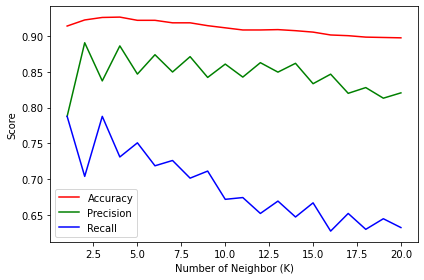

In [ ]:
plt.plot(range(1,Ks), accuracies, 'r')
plt.plot(range(1,Ks), precisions, 'g')
plt.plot(range(1,Ks), recalls, 'b')
plt.legend(("Accuracy", 'Precision', "Recall"))
plt.ylabel("Score")
plt.xlabel("Number of Neighbor (K)")
plt.tight_layout()
plt.show

In [ ]:
max_accuracy = max(accuracies)
max_precision = max(precisions)
max_recall = max(recalls)

print("Akurasi Terbaik Adalah : ", max_accuracy, "dengan nilai k = ", accuracies.index(max_accuracy)+1)
print("Precision Terbaik Adalah : ", max_precision, "dengan nilai k = ", precisions.index(max_precision)+1)
print("Recall Terbaik Adalah : ", max_recall, "dengan nilai k = ", recalls.index(max_recall)+1)

Akurasi Terbaik Adalah :  0.9265 dengan nilai k =  4
Precision Terbaik Adalah :  0.890625 dengan nilai k =  2
Recall Terbaik Adalah :  0.7876543209876543 dengan nilai k =  1


## modeling dengan k = 4

In [ ]:
k = 4

model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [ ]:
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy :  0.942375
Test set Accuracy :  0.9265
